In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('07-10-2021_10-21_PM_EUR_USD/5671_data.csv')

In [3]:
data.shape

(50, 22)

In [4]:
data.head(30)

,x,y,Date,Time,Weekday,Weekday_Name,UTC_Time,Volume,Open,High,...,O-H,O-L,O-C,H-L,H-C,L-C,Direction,col_1,col_2,col_3
0,1,1.13394,3/18/19,17:00:00,0,Monday,2019-03-18T17:00:00.000000000Z,1278,1.13294,1.13430,...,-0.00136,0.00046,-0.00100,0.00182,0.00036,-0.00146,1,-0.00100,0.00136,0.00146
1,2,1.13380,3/18/19,21:00:00,0,Monday,2019-03-18T21:00:00.000000000Z,647,1.13354,1.13401,...,-0.00047,0.00016,-0.00026,0.00063,0.00021,-0.00042,1,-0.00026,0.00047,0.00042
2,3,1.13460,3/19/19,1:00:00,1,Tuesday,2019-03-19T01:00:00.000000000Z,695,1.13382,1.13489,...,-0.00107,0.00014,-0.00078,0.00121,0.00029,-0.00092,1,-0.00078,0.00107,0.00092
3,4,1.13546,3/19/19,5:00:00,1,Tuesday,2019-03-19T05:00:00.000000000Z,1720,1.13458,1.13574,...,-0.00116,0.00034,-0.00088,0.00150,0.00028,-0.00122,1,-0.00088,0.00116,0.00122
4,5,1.13522,3/19/19,9:00:00,1,Tuesday,2019-03-19T09:00:00.000000000Z,2569,1.13543,1.13616,...,-0.00073,0.00070,0.00021,0.00143,0.00094,-0.00049,0,0.00021,0.00073,0.00049
5,6,1.13496,3/19/19,13:00:00,1,Tuesday,2019-03-19T13:00:00.000000000Z,3773,1.13520,1.13614,...,-0.00094,0.00132,0.00024,0.00226,0.00118,-0.00108,0,0.00024,0.00094,0.00108
6,7,1.13507,3/19/19,17:00:00,1,Tuesday,2019-03-19T17:00:00.000000000Z,1232,1.13498,1.13592,...,-0.00094,0.00022,-0.00009,0.00116,0.00085,-0.00031,1,-0.00009,0.00094,0.00031
7,8,1.13473,3/19/19,21:00:00,1,Tuesday,2019-03-19T21:00:00.000000000Z,654,1.13521,1.13569,...,-0.00048,0.00048,0.00048,0.00096,0.00096,0.00000,0,0.00048,0.00048,0.00000
8,9,1.13462,3/20/19,1:00:00,2,Wednesday,2019-03-20T01:00:00.000000000Z,717,1.13470,1.13504,...,-0.00034,0.00040,0.00008,0.00074,0.00042,-0.00032,0,0.00008,0.00034,0.00032
9,10,1.13430,3/20/19,5:00:00,2,Wednesday,2019-03-20T05:00:00.000000000Z,1738,1.13459,1.13535,...,-0.00076,0.00101,0.00029,0.00177,0.00105,-0.00072,0,0.00029,0.00076,0.00072


<AxesSubplot:xlabel='x', ylabel='y'>

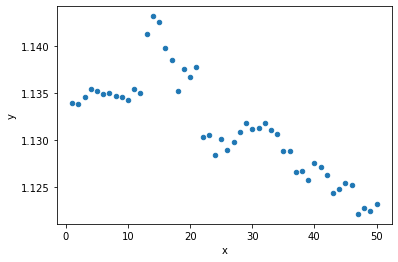

In [5]:
data.plot(kind='scatter',x='x',y='y') # scatter plot

In [6]:
x = data.iloc[0:18,0].values.reshape(-1, 1)
y = data.iloc[0:18,1].values.reshape(-1, 1)

In [7]:
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
y_pred = linear_regressor.predict(x)

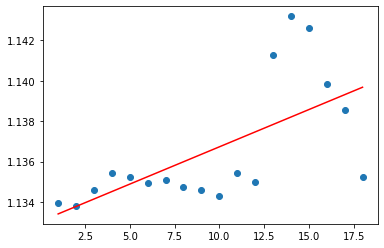

In [8]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [10]:
print('"Goodness of Fit" is', r2_score(y, y_pred).round(2)*100, '%')

"Goodness of Fit" is 41.0 %


In [11]:
coeficient = (linear_regressor.coef_)
if coeficient > 0:
    print('Buy baby!!')
else:
    print('Sell baby!!')

Buy baby!!


In [24]:
def viz(data):
    fig = go.Figure(data=[go.Candlestick(x=data['UTC_Time'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

    fig.update_layout(xaxis_rangeslider_visible=False,
                      title=pair,
                      title_font_color="blue",
                      title_font_size = 20)
    
    fig.update_xaxes(rangebreaks=[dict(bounds=["sat", "mon"])])
    
    fig.show()

In [16]:
pair = "EURUSD"
timeframe = "H4"

In [17]:
viz(data)

In [9]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# yahoo finance is used to fetch data
import yfinance as yf

In [10]:
# Read data
Df = yf.download('GLD', '2008-01-01', '2020-6-22', auto_adjust=True)

Df.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,83.559998,85.139999,83.440002,84.860001,12291100
2008-01-03,84.870003,85.940002,84.599998,85.570000,9553900
2008-01-04,85.339996,85.550003,84.430000,85.129997,8402200
2008-01-07,85.239998,85.260002,84.570000,84.769997,6944300
2008-01-08,86.279999,87.129997,86.160004,86.779999,9567900


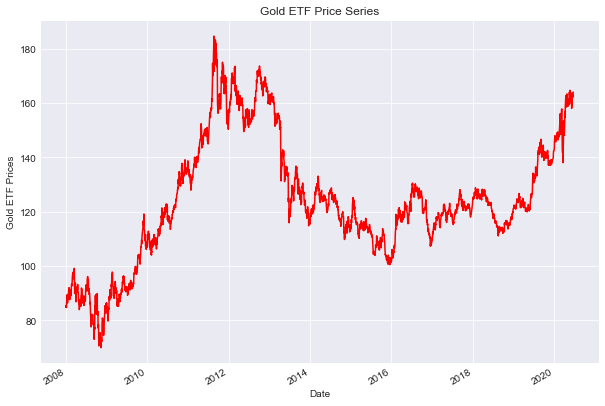

In [11]:
# Only keep close columns
Df = Df[['Close']]

# Drop rows with missing values
Df = Df.dropna()

# Plot the closing price of GLD
Df.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

In [12]:
# Define explanatory variables
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)
Df.head()

,Close,S_3,S_9,next_day_price
Date,,,,
2008-01-02,84.860001,NaN,NaN,85.570000
2008-01-03,85.570000,NaN,NaN,85.129997
2008-01-04,85.129997,85.186666,NaN,84.769997
2008-01-07,84.769997,85.156665,NaN,86.779999
2008-01-08,86.779999,85.559998,NaN,86.550003


In [13]:

Df = Df.dropna()
X = Df[['S_3', 'S_9']]
X


,S_3,S_9
Date,,
2008-01-14,88.790001,86.670000
2008-01-15,88.703334,87.017777
2008-01-16,88.076665,87.143333
2008-01-17,87.063332,87.295555
2008-01-18,86.873332,87.590000
...,...,...
2020-06-12,162.860001,161.227778
2020-06-15,162.446665,161.197778
2020-06-16,162.399999,161.492221


In [14]:
# Define dependent variable
y = Df['next_day_price']
y

Date
2008-01-14     87.989998
2008-01-15     86.699997
2008-01-16     86.500000
2008-01-17     87.419998
2008-01-18     88.169998
                 ...    
2020-06-12    162.330002
2020-06-15    162.250000
2020-06-16    162.559998
2020-06-17    162.240005
2020-06-18    164.029999
Name: next_day_price, Length: 3130, dtype: float64

In [15]:
# Split the data into train and test dataset
t = .8
t = int(t*len(Df))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [16]:
#Y = m1 * X1 + m2 * X2 + C
#Gold ETF price = m1 * 3 days moving average + m2 * 15 days moving average + c

In [17]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Price (y) = 1.20 * 3 Days Moving Average (x1) + -0.21 * 9 Days Moving Average (x2) + 0.43 (constant)


Text(0, 0.5, 'Gold ETF Price')

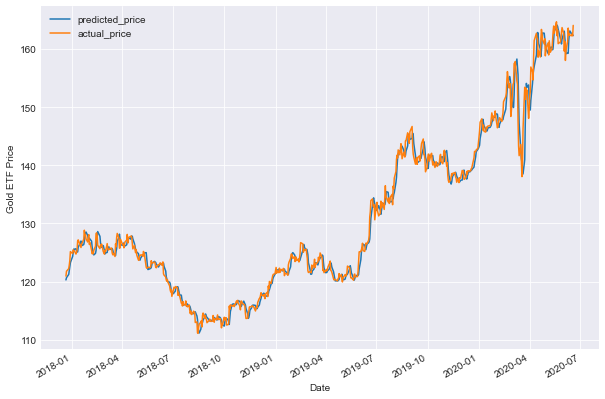

In [18]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")

In [19]:
# R square
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

98.85

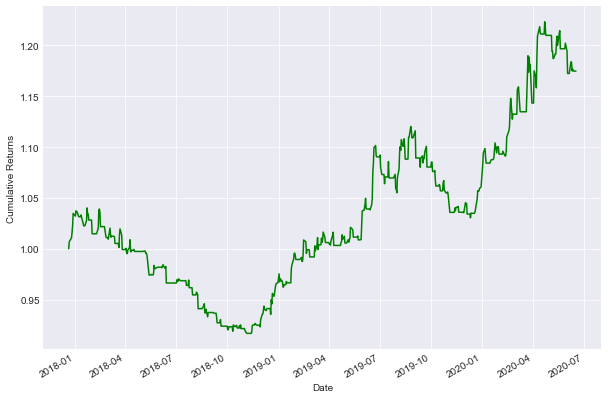

In [20]:
gold = pd.DataFrame()

gold['price'] = Df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)

gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)

gold['strategy_returns'] = gold.signal * gold['gold_returns']
((gold['strategy_returns']+1).cumprod()).plot(figsize=(10,7),color='g')
plt.ylabel('Cumulative Returns')
plt.show()

In [21]:
# Calculate sharpe ratio
sharpe = gold['strategy_returns'].mean()/gold['strategy_returns'].std()*(252**0.5)
'Sharpe Ratio %.2f' % (sharpe)

'Sharpe Ratio 0.73'

In [22]:
# import datetime and get today's date
import datetime as dt
current_date = dt.datetime.now()

# Get the data
data = yf.download('GLD', '2008-06-01', current_date, auto_adjust=True)
data['S_3'] = data['Close'].rolling(window=3).mean()
data['S_9'] = data['Close'].rolling(window=9).mean()
data = data.dropna()

# Forecast the price
data['predicted_gold_price'] = linear.predict(data[['S_3', 'S_9']])
data['signal'] = np.where(data.predicted_gold_price.shift(1) < data.predicted_gold_price,"Buy","No Position")

# Print the forecast
data.tail(1)[['signal','predicted_gold_price']].T

[*********************100%***********************]  1 of 1 completed


<ipython-input-22-5b97dcdb0a42>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-5b97dcdb0a42>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date,2021-09-22
signal,Buy
predicted_gold_price,165.188
